In [11]:
f = 4.5
i = 4

In [20]:
print("float %s Int %s." %(f,i))

float 4.5 Int 4.


Alternatively

In [19]:
print("float %f. int %d."%(f,i))

float 4.500000. int 4.


In [21]:
square = lambda x:x**2
square(5)

25

In [22]:
trial = lambda y:square(y)
trial(5)

25

In [33]:
def add(y):
     global x
     x += y
     return square(x)
x,y = 2,8
add(y)
x

10

In [1]:
import turicreate as tc

In [3]:
sf = tc.SFrame('people-example.csv')

Finished parsing file /root/ml/people-example.csv

Parsing completed. Parsed 7 lines in 0.016989 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /root/ml/people-example.csv

Parsing completed. Parsed 7 lines in 0.037995 secs.

In [4]:
sf.head()
sf.tail()

First Name,Last Name,Country,age
Bob,Smith,United States,24
Alice,Williams,Canada,23
Malcolm,Jone,England,22
Felix,Brown,USA,23
Alex,Cooper,Poland,23
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


In [5]:
sf['Country']
sf['age'].sum()

162

In [5]:
sf[sf['First Name'] == 'Bob']

First Name,Last Name,Country,age
Bob,Smith,United States,24


In [7]:
names = sf['First Name']
names
type(names)

turicreate.data_structures.sarray.SArray

In [8]:
sf1 = tc.SFrame({'Name':['Achira'],'Roll no':[7]})
sf2 = tc.SFrame({'Name':['Varsha'],'Roll no':[32]})

In [9]:
sf1.append(sf2)

Name,Roll no
Achira,7
Varsha,32


In [10]:
tc.visualization.set_target('auto')

In [11]:
sf.show()

Materializing SFrame

<BarContainer object of 4 artists>

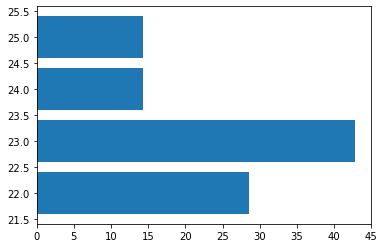

In [12]:
s = sf['age'].value_counts()
x = tc.SArray(s['count']/s['count'].sum() *100)
s['prop'] = x
import matplotlib.pyplot as plt
plt.barh(s['value'],s['prop'])

In [13]:
sf['Full Name'] = sf['First Name'] + ' ' + sf['Last Name']
sf

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone
Felix,Brown,USA,23,Felix Brown
Alex,Cooper,Poland,23,Alex Cooper
Tod,Campbell,United States,22,Tod Campbell
Derek,Ward,Switzerland,25,Derek Ward


In [14]:
sf['age'].max()
sf['age'].min()
sf['age'].mean()

23.142857142857146

In [15]:
sf['age'] + 2
sf['age'] * sf['age']

dtype: int
Rows: 7
[576, 529, 484, 529, 529, 484, 625]

In [16]:
def transform_country(country):
    if country == 'USA':
        return 'United States'
    else:
        return country

In [17]:
transform_country('India')

'India'

In [18]:
sf['Country'] = sf['Country'].apply(transform_country)
sf

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone
Felix,Brown,United States,23,Felix Brown
Alex,Cooper,Poland,23,Alex Cooper
Tod,Campbell,United States,22,Tod Campbell
Derek,Ward,Switzerland,25,Derek Ward


In [6]:
sf3 = tc.SFrame('people_wiki.sframe')
sf3.tail(1)

URI,name,text
<http://dbpedia.org/resource/Fawaz_Damrah> ...,Fawaz Damrah,fawaz mohammed damraharabic fawwz damra was ...


In [8]:
sf3[sf3['name'] == 'Harpdog Brown']['text']

dtype: str
Rows: ?
['harpdog brown is a singer and harmonica player who has been active in canadas blues scene since 1982 hailing from vancouver he crossed tens of thousands of miles playing club dates and festivals in canada the northwestern united states and germanyover the years he has issued seven cds in 1995 his home is where the harp is won the muddy award for the best nw blues release from the cascade blues association in portland oregon as well that year it was nominated for a canadian juno for the best bluesgospel recording teamed up with graham guest on piano his cd naturally was voted 1 canadian blues album of 2010 by the blind lemon surveybrown tours extensively with his guitarist j arthur edmonds performing their electric mid1950s chicago blues either as a duo or with the full band while he is home he juggles a few combos working many venues big and small he also leads the harpdog brown band which is a gutsy traditional chicago blues band in 2014 they released what it is c

In [46]:
sf3.sort('text',ascending=True)

URI,name,text
<http://dbpedia.org/resource/108_(artist)> ...,108 (artist),108 born 1978 is anitalian artist in the ...
<http://dbpedia.org/resource/1.8.7> ...,1.8.7,187 is a pseudonym forjordana lesesne a ...
<http://dbpedia.org/resource/Diane_Carlson_Evans> ...,Diane Carlson Evans,1lt diane carlson evansanc rvn born 1946 served ...
<http://dbpedia.org/resource/Robert_Godley> ...,Robert Godley,1robert godley b 7 july1971 in whitstable kent ...
<http://dbpedia.org/resource/Lisa_Mullins> ...,Lisa Mullins,2012 gracie award winnerlisa mullins is an ...
<http://dbpedia.org/resource/Martijn_Meeuwis> ...,Martijn Meeuwis,250px250pxmartijn meeuwisborn july 14 1982 in ...
<http://dbpedia.org/resource/8_Ball_Aitken> ...,8 Ball Aitken,8 ball aitken born 8 june1987 is an australian ...
<http://dbpedia.org/resource/8th_Arjia_Rinpoche> ...,8th Arjia Rinpoche,8th agya hotogtu lobsangtubten jigme gyatso ...
<http://dbpedia.org/resource/Jim_Gould> ...,Jim Gould,a canadian foreignaffairs intelligence ...
<http://dbpedia.org/resource/David_L._Holmes> ...,David L. Holmes,a church historian davidl holmes is walter g ...
